In [180]:
!pip install google_play_scraper

In [181]:
from google_play_scraper import reviews, Sort
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
apps = {
    "Amazon": "com.amazon.mShop.android.shopping",
    "Shein": "com.zzkko",
    "AliExpress": "com.alibaba.aliexpresshd",
    "Noon": "com.noon.buyerapp",
    "Trendyol": "trendyol.com"
}


In [183]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

In [184]:
all_reviews = []

for app_name, app_id in apps.items():
    print(f"Fetching reviews for {app_name}...")

    result, _ = reviews(
        app_id,
        lang="en",
        country="us",
        sort=Sort.NEWEST,
        count=3000
    )

    for r in result:
        all_reviews.append({
            "app_name": app_name,
            "review_text": r["content"],
            "rating": r["score"],
            "sentiment_label": label_sentiment(r["score"])
        })

Fetching reviews for Amazon...
Fetching reviews for Shein...
Fetching reviews for AliExpress...
Fetching reviews for Noon...
Fetching reviews for Trendyol...


In [185]:
df = pd.DataFrame(all_reviews)
df.head()


,app_name,review_text,rating,sentiment_label
0,Amazon,Thank you Amazon & Prime,5,Positive
1,Amazon,it needs an update in settings tablet update A...,5,Positive
2,Amazon,will not open for no reason,1,Negative
3,Amazon,The prime feature of the app is poor! whenever...,1,Negative
4,Amazon,Amazon just got alot worse! I removed the app....,1,Negative


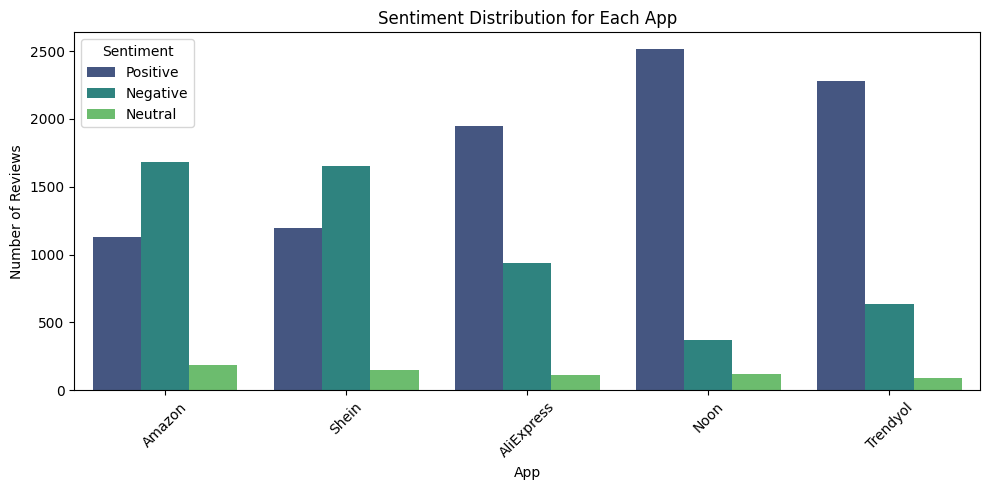

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

df_before = df.copy()
plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_before,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [187]:
print ("Before: \n", df_before["sentiment_label"]. value_counts ())

Before: 
 sentiment_label
Positive    9062
Negative    5279
Neutral      659
Name: count, dtype: int64


In [188]:
df = df[df["review_text"].astype(str).str.contains(r"[A-Za-z]", na=False)].copy()
df["review_text"] = df["review_text"].astype(str)
df = df[df["review_text"].str.strip().ne("")].copy()

print("After language/empty filtering:", len(df))

After language/empty filtering: 14448


In [189]:
import re



def clean_text(text):

    text = re.sub(r"http\S+", "", str(text))

    text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = text.lower()

    return text



df["clean_review"] = df["review_text"].apply(clean_text)

In [190]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [191]:
df[["review_text", "clean_review"]].head(10)

,review_text,clean_review
0,Thank you Amazon & Prime,thank you amazon prime
1,it needs an update in settings tablet update A...,it needs an update in settings tablet update a...
2,will not open for no reason,will not open for no reason
3,The prime feature of the app is poor! whenever...,the prime feature of the app is poor whenever ...
4,Amazon just got alot worse! I removed the app....,amazon just got alot worse i removed the app i...
5,It doesnt let me create a account even when sa...,it doesnt let me create a account even when sa...
6,Dark patterns,dark patterns
7,best,best
8,"Works fine, still waiting for Dark Mode",works fine still waiting for dark mode
9,"Amazon's final straw, loyal customers insulted...",amazons final straw loyal customers insulted i...


In [192]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [193]:
df["Tokens"]= df["clean_review"].apply(word_tokenize)
df[[ "clean_review","Tokens"]].head(5)

,clean_review,Tokens
0,thank you amazon prime,"[thank, you, amazon, prime]"
1,it needs an update in settings tablet update a...,"[it, needs, an, update, in, settings, tablet, ..."
2,will not open for no reason,"[will, not, open, for, no, reason]"
3,the prime feature of the app is poor whenever ...,"[the, prime, feature, of, the, app, is, poor, ..."
4,amazon just got alot worse i removed the app i...,"[amazon, just, got, alot, worse, i, removed, t..."


In [194]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

r
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["Tokens_No_Stopwords"] = df["Tokens"].apply(remove_stopwords)


def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["Tokens_No_Stopwords_Lemmatized"] = df["Tokens_No_Stopwords"].apply(lemmatize_tokens)


df[["Tokens", "Tokens_No_Stopwords", "Tokens_No_Stopwords_Lemmatized"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tokens,Tokens_No_Stopwords,Tokens_No_Stopwords_Lemmatized
0,"[thank, you, amazon, prime]","[thank, amazon, prime]","[thank, amazon, prime]"
1,"[it, needs, an, update, in, settings, tablet, ...","[needs, update, settings, tablet, update, anne...","[need, update, setting, tablet, update, annett..."
2,"[will, not, open, for, no, reason]","[open, reason]","[open, reason]"
3,"[the, prime, feature, of, the, app, is, poor, ...","[prime, feature, app, poor, whenever, says, ne...","[prime, feature, app, poor, whenever, say, nex..."
4,"[amazon, just, got, alot, worse, i, removed, t...","[amazon, got, alot, worse, removed, app, dont,...","[amazon, got, alot, worse, removed, app, dont,..."


In [195]:
df['tokens_str'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ' '.join(x))
df = df.drop_duplicates(subset='tokens_str', keep='first')

In [196]:
df = df.drop(columns=['tokens_str'])

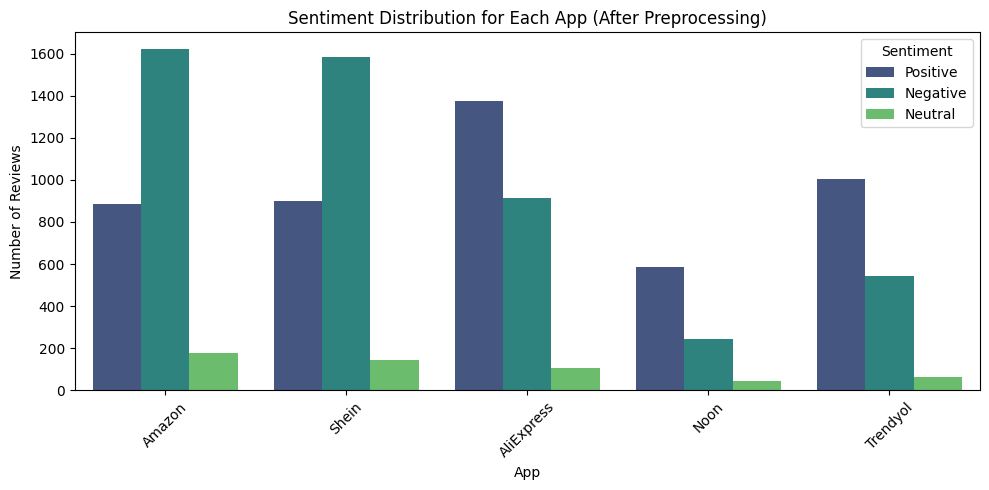

In [197]:
df_after = df.copy()

plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_after,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App (After Preprocessing)")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [198]:

print("\nAfter:\n", df_after["sentiment_label"].value_counts() )


After:
 sentiment_label
Negative    4907
Positive    4742
Neutral      540
Name: count, dtype: int64


In [199]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [200]:
from google.colab import files
files.download("google_play_app_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['final_text'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ''.join(x))
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['final_text'])
print(type(X))
y = df['sentiment_label']

<class 'scipy.sparse._csr.csr_matrix'>


In [203]:

# BoW
from sklearn. feature_extraction.text import CountVectorizer
bow = CountVectorizer (max_features=5000)
X_train_bow = bow. fit_transform(X_train)
X_test_bow = bow. transform(X_test)

print("BoW :", X_bow.shape)

BoW : (10191, 5000)
